1. Import Libraries

In [43]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns   

2. Extracting Data using API

In [68]:
import requests
import json
Data_API = requests.get('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
Data = Data_API.text
parse_json=json.loads(Data) #parses the json objects

In [94]:
#parse_json['location'] = parse_json['location'].apply(lambda x: {} if pd.isna(x) else x)
#df = json_normalize(parse_json, record_path=[['location']])
df = json_normalize(parse_json)
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df['Request_Closing_Time'] = df['created_date'] - df['closed_date']
#print(df.loc[1,:]) #prints first row of the dataset
print(df.head())

  unique_key        created_date agency                      agency_name  \
0   52558908 2021-11-19 02:10:56   NYPD  New York City Police Department   
1   52557845 2021-11-19 02:10:24   NYPD  New York City Police Department   
2   52556870 2021-11-19 02:09:41   NYPD  New York City Police Department   
3   52561303 2021-11-19 02:09:36   NYPD  New York City Police Department   
4   52561166 2021-11-19 02:09:35   NYPD  New York City Police Department   

        complaint_type        descriptor               location_type  \
0      Illegal Parking   Blocked Hydrant             Street/Sidewalk   
1      Noise - Vehicle    Car/Truck Horn             Street/Sidewalk   
2  Noise - Residential  Loud Music/Party  Residential Building/House   
3  Noise - Residential  Loud Music/Party  Residential Building/House   
4   Noise - Commercial  Loud Music/Party         Club/Bar/Restaurant   

  incident_zip         incident_address         street_name  ...  \
0        11385     1727 STANHOPE STREET   

<AxesSubplot:>

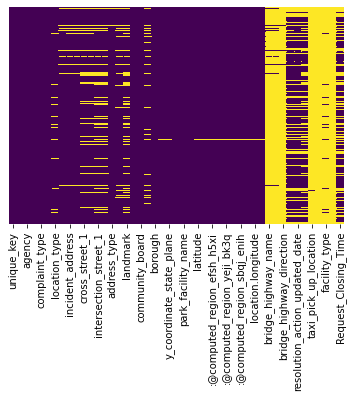

In [95]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heat map of missing data

In [86]:
df1=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
print(df1.head())

/Users/adarshkp/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,17,18,20,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


   Unique Key            Created Date             Closed Date Agency  \
0    21739884  10/26/2011 07:31:00 PM  12/23/2011 12:00:00 PM   DSNY   
1    21738939  10/26/2011 10:31:00 AM  10/26/2011 01:10:00 PM    DEP   
2    21738160  10/26/2011 12:00:00 AM  11/10/2011 12:00:00 AM    HPD   
3    21738643  10/26/2011 12:00:00 AM  10/26/2011 12:00:00 AM    HPD   
4    21739724  10/26/2011 12:00:00 AM  10/31/2011 12:00:00 AM    HPD   

                                         Agency Name    Complaint Type  \
0                            P - Manhattan and Bronx  Dirty Conditions   
1             Department of Environmental Protection             Sewer   
2  Department of Housing Preservation and Develop...          PLUMBING   
3  Department of Housing Preservation and Develop...           HEATING   
4  Department of Housing Preservation and Develop...           HEATING   

                         Descriptor         Location Type Incident Zip  \
0  E12 Illegal Dumping Surveillance             

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis') #heat map of missing data